# Esercitazione 10

## Esercizio 10.1

Implemento l'algoritmo di simulated annealing per il travelling salesman problem. Fornisco i vari parametri che diversificano le simulazioni tramite il file _input.dat_. Ho preparato dei file _input.c_ e _input.s_ per i due casi in esame (c per circonferenza, s per quadrato). Si possono eseguire tutti contemporaneamente tramite lo script _runall.py_.

Per l'esponente della funzione di selezione, che utilizzo per creare nuove generazioni di individui, scelgo $p=5$, quindi: $j = N \times r^5$. Ho osservato che, per la circonferenza, 5 mi porta a una convergenza rapida dell'algoritmo rispetto a valori più alti o più bassi. Invece per il quadrato, $p=6$ risulta essere più adatto.

Utilizzo le stesse mutazioni implementate per l'algoritmo genetico, tutte con una probabilità del 10%: 
- _randomswap_: scambia due elementi casuali nella sequenza delle città;
- _contswap_: scambia dei tratti di sequenza, di lunghezza e posizione variabile all'interno della successione di città;
- _shift_: sposta nell'ultima posizione un elemento casuale della sequenza.

Dispongo le città su una circonferenza e in un quadrato, come mostrato nella figura di seguito.

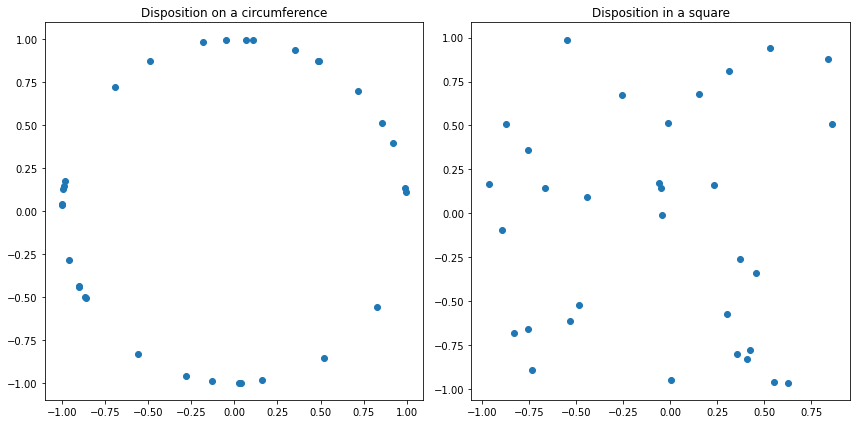

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

x1,y1 = np.loadtxt("es10/c/cities.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10/s/cities.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].scatter(x1,y1)
axs[0].set_title("Disposition on a circumference")
axs[1].set_title("Disposition in a square")
axs[1].scatter(x2,y2)

Eseguo la simulazione, ottenendo risultati soddisfacenti. 

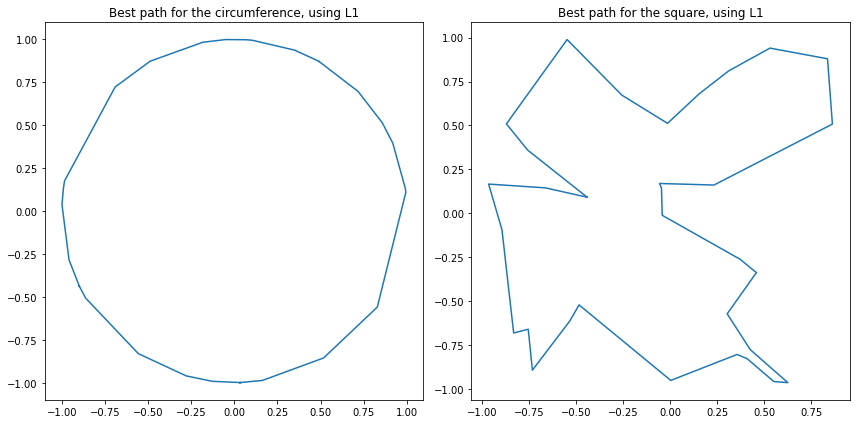

In [2]:
x1,y1 = np.loadtxt("es10/c/final.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10/s/final.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].plot(x1,y1)
axs[0].set_title("Best path for the circumference, using L1")
axs[1].set_title("Best path for the square, using L1")
axs[1].plot(x2,y2)

Rappresento di seguito l'andamento della loss nei due casi. Ho regolato il numero di step Montecarlo per evitare di continuare a eseguire a lungo l'algoritmo una volta raggiunta la convergenza. In ogni blocco MC eseguo 10000 step. 

Come temperatura di partenza ho impostato 1000, e la riduco del 20% a ogni step.

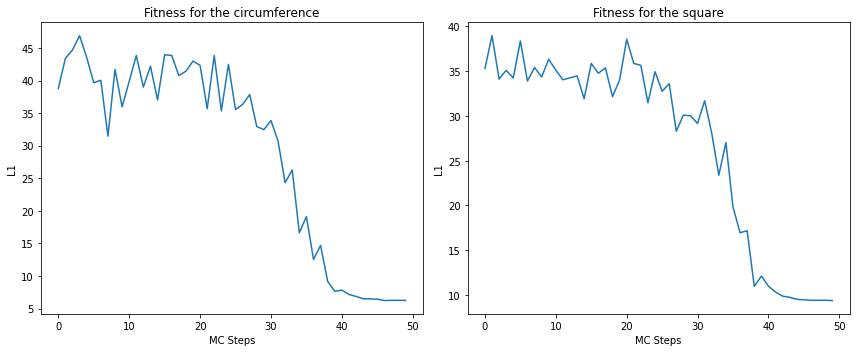

In [3]:
fit1 = np.loadtxt("es10/c/fitness.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es10/s/fitness.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_ylabel("L1")
axs[0].set_xlabel("MC Steps")
axs[0].set_title("Fitness for the circumference")
axs[1].set_title("Fitness for the square")
axs[1].set_ylabel("L1")
axs[1].set_xlabel("MC Steps")
axs[1].plot(fit2)

## Esercizio 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

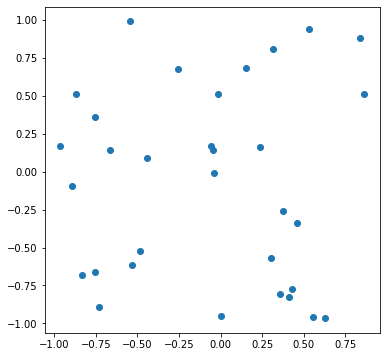

In [15]:
x,y = np.loadtxt("es10_2/cities.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

Text(0.5, 1.0, 'Best path for the square, using L1')

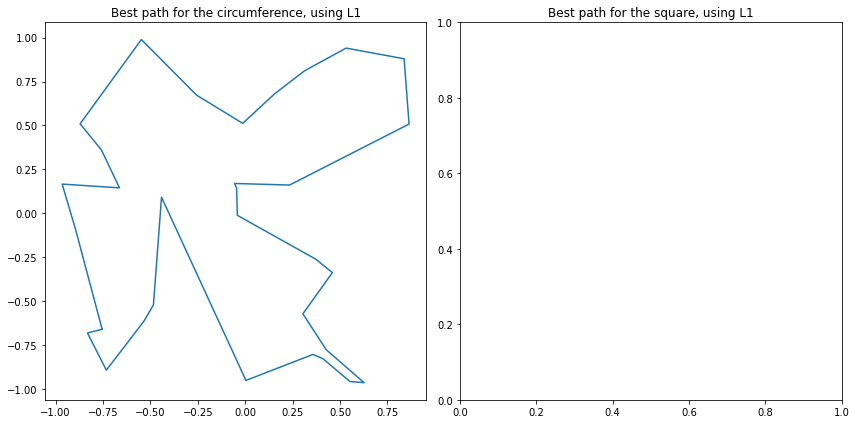

In [14]:
x1,y1 = np.loadtxt("es10_2/final.out", usecols=(0,1), delimiter=',', unpack='true')
x2,y2 = np.loadtxt("es10/s/final.out", usecols=(0,1), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,6))
axs[0].plot(x1,y1)
axs[0].set_title("Best path for the circumference, using L1")
axs[1].set_title("Best path for the square, using L1")
#axs[1].plot(x2,y2)

Text(0.5, 0, 'MC Steps')

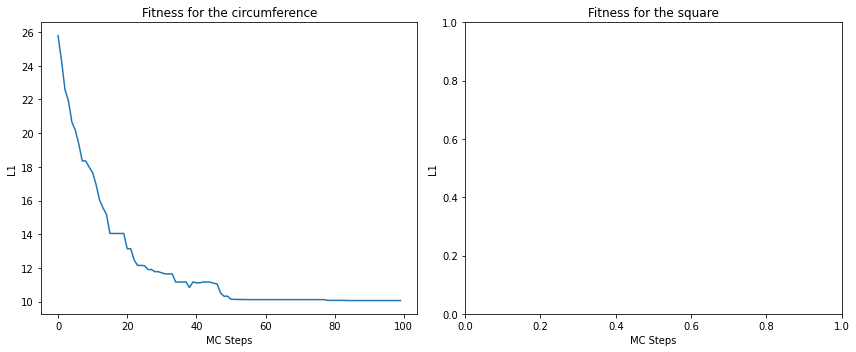

In [16]:
fit1 = np.loadtxt("es10_2/fitness.out", usecols=(0), delimiter=',', unpack='true')
fit2 = np.loadtxt("es10/s/fitness.out", usecols=(0), delimiter=',', unpack='true')

fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(12,5))
axs[0].plot(fit1)
axs[0].set_ylabel("L1")
axs[0].set_xlabel("MC Steps")
axs[0].set_title("Fitness for the circumference")
axs[1].set_title("Fitness for the square")
axs[1].set_ylabel("L1")
axs[1].set_xlabel("MC Steps")
# axs[1].plot(fit2)